# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from matplotlib.patches import ConnectionPatch

%matplotlib inline
plt.style.use('ggplot')

### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [2]:
# Read in data
data = pd.read_csv('Cookies.csv')

In [3]:
# Perform your data wrangling and descriptive stats to help
def others(dataset):   
    if len(dataset) > 5:
        otherslist = {}
        for key, value in dataset.items():
            if value < 9:
                otherslist[key] = value
    dataset['Others'] = sum(otherslist.values())
    for key, value in otherslist.items():
        dataset.pop(key)
    return dataset, otherslist

best_data = dict(data['Best cookie'].value_counts())
a = others(best_data)
b_data, othersb_data = a[0], a[1]

worst_data = dict(data['Worst cookie'].value_counts())
b = others(worst_data)
w_data, othersw_data = b[0], b[1]


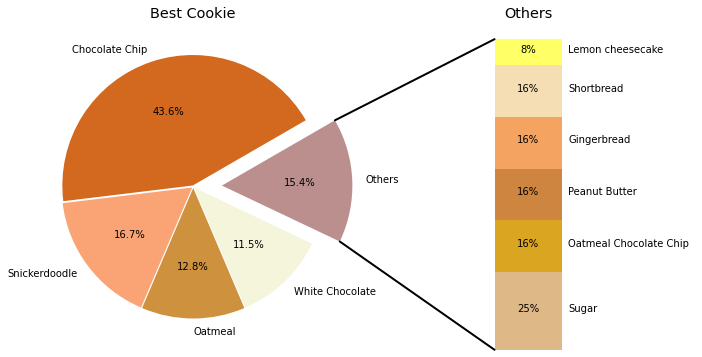

<Figure size 432x288 with 0 Axes>

In [4]:
# Visualize your data
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)


ratios = list(b_data.values())
labels = b_data.keys()
explode = [0.01, 0.01, 0.01, 0.01, 0.22]
fig = plt.figure()
colors = ['#D2691E','#faa476','#ce913e','#F5F5DC','#BC8F8F']
ax1.pie(ratios, autopct='%1.1f%%', startangle=30, labels=labels, explode=explode, colors=colors)

ax1.set_title('Best Cookie')


xpos = 0
bottom = 0
ratios = list(othersb_data.values())
width = .2
labels = list(othersb_data.keys())
color = ['#DEB887','#DAA520','#CD853F','#F4A460','#F5DEB3','#FFFF66']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color= color[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (((ax2.patches[j].get_height())/sum(ratios)) * 100),
             ha='center')
    ax2.text(0.12, ypos, str(labels[j]), ha= 'left')

ax2.set_title('Others')
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[-1].theta1, ax1.patches[-1].theta2
center, r = ax1.patches[-1].center, ax1.patches[-1].r
bar_height = sum([item.get_height() for item in ax2.patches])

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()
fig.savefig('Best Cookie_ramos_anna.png')

Caption: This is a figure about What is the Best Cookie!